In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()



In [2]:

data = spark.read.csv('kolera-katarina-1853.csv', header=True)

In [3]:
data = data.withColumnRenamed('Dödsdatum', 'Date').withColumnRenamed('Namn', 'Name').withColumnRenamed('Ålder', 'Age').withColumnRenamed('Kön', 'Gender')
df = data.select(['Date','Gender', 'Name']).groupBy('Date').count().sort(data.Date.desc())
df_for_plot = df.toPandas()


<AxesSubplot:ylabel='Date'>

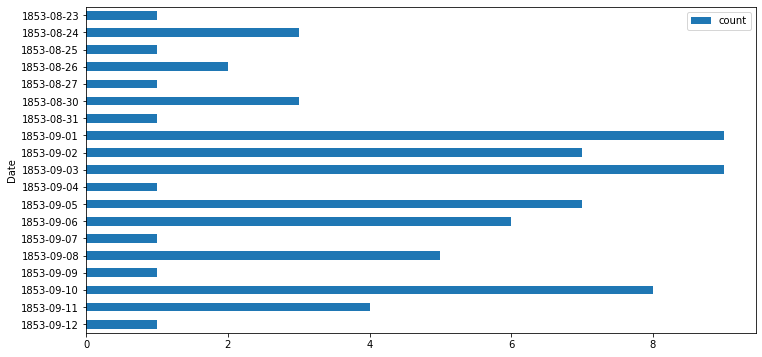

In [4]:
df_for_plot.plot(kind='barh', x='Date', y=df_for_plot.columns.tolist()[1:], figsize=(12, 6), ylabel='Dead', xlabel='Date')